In [11]:
import yaml

with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)
    

In [2]:
import pandas as pd
import random
from random import randrange
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [12]:
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)
train_df.drop(columns=['ID'], inplace=True)
train_df.drop(columns=['Name'], inplace=True)
train_df.drop(columns=['SSN'], inplace=True)
train_df.drop(columns=['Customer_ID'], inplace=True)
train_df.drop(columns=['Monthly_Inhand_Salary'], inplace=True)
train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna("Not Specified")

In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
label_encoder = LabelEncoder()

train_df['Month'] = pd.Series(label_encoder.fit_transform(train_df['Month']))
train_df['Occupation'] = pd.Series(label_encoder.fit_transform(train_df['Occupation']))
train_df['Type_of_Loan'] = pd.Series(label_encoder.fit_transform(train_df['Type_of_Loan']))
train_df['Payment_Behaviour'] = pd.Series(label_encoder.fit_transform(train_df['Payment_Behaviour']))
train_df['Credit_Score'] = train_df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good':2})
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 1, 'Yes':2})
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace({'Bad': 0, 'Standard': 1, '-':2, 'Good':3})

C:\Users\snw12\AppData\Local\Temp\ipykernel_34116\3048474367.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Credit_Score'] = train_df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good':2})
C:\Users\snw12\AppData\Local\Temp\ipykernel_34116\3048474367.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 1, 'Yes':2})


In [203]:
class HotEncode:
    def __init__(self, train_df):
        self.train_df = train_df

    def encoderr(self, odf):
        encoder = OneHotEncoder(sparse_output=False)
        df = odf.to_frame()
        encodedData = encoder.fit_transform(df)
        encoded_df = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(df.columns))
        self.train_df.drop(columns=[odf.name], inplace=True)
        self.train_df = pd.concat([self.train_df,encoded_df], axis=1)
        return self.train_df

encoder = HotEncode(train_df)
train_df = encoder.encoderr(train_df['Payment_Behaviour'])
train_df = encoder.encoderr(train_df['Payment_of_Min_Amount'])
train_df = encoder.encoderr(train_df['Credit_Mix'])
#train_df = encoder.encoderr(train_df['Credit_Score'])

In [14]:
def parse_data(value):
    if type(value) == float:
        return value
    else: return int(value.split(' ')[0]) *12 + int(value.split(' ')[3])

train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

In [15]:
def convert_to_float_or_random(value):
    if type(value) == float:
        return value
    elif type(value) is int:
        return value
    elif value == '__10000__':
        return 1111111
    elif value == "__-333333333333333333333333333__":
        return 3333333
    elif value == '_':
        return 0
    elif value[-1] == '_':
        try: return float(value[0:-1])
        except ValueError:
            print(value)
    else:
        try:
            return float(value)
        except ValueError:
            print(value)
train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

In [16]:
for col, upper_bound in (
    ('Age', 80),
    ('Num_Bank_Accounts', 20),
    ('Num_Credit_Card', 20),
    ('Interest_Rate', 40),
    ('Num_of_Loan', 20),
    ('Num_of_Delayed_Payment', 40),
    ('Num_Credit_Inquiries', 25),
    ('Amount_invested_monthly',400 ),
    ('Total_EMI_per_month', 250),
    ('Annual_Income', 100000),
    ('Monthly_Balance', 600 )

):
    train_df = train_df.drop(train_df[train_df[col] > upper_bound].index)

for col, down_bound in (
    ('Age', 1),
    ('Num_Bank_Accounts', 0),
    ('Num_Credit_Card', 0),
    ('Interest_Rate', 0),
    ('Num_of_Loan', 0),
    ('Num_of_Delayed_Payment', 0),
    ('Num_Credit_Inquiries', 0),
        
    ('Amount_invested_monthly',0 )

):
    
    
    train_df = train_df.drop(train_df[train_df[col] < down_bound].index)


In [18]:
train_df.isna().sum()


Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [9]:
num_сols_with_missing = [col for col in train_df.columns
                         if train_df[col].isnull().any()]

train_df=train_df.dropna(subset=num_сols_with_missing)

In [186]:
train_df['Monthly_Inhand_Salary'] = train_df['Monthly_Inhand_Salary'].dropna() 

In [38]:
a = int(train_df['Monthly_Inhand_Salary'].mean())
b = int(train_df['Monthly_Inhand_Salary'].std())
train_df['Monthly_Inhand_Salary']=train_df['Monthly_Inhand_Salary'].fillna(randrange(b,a))

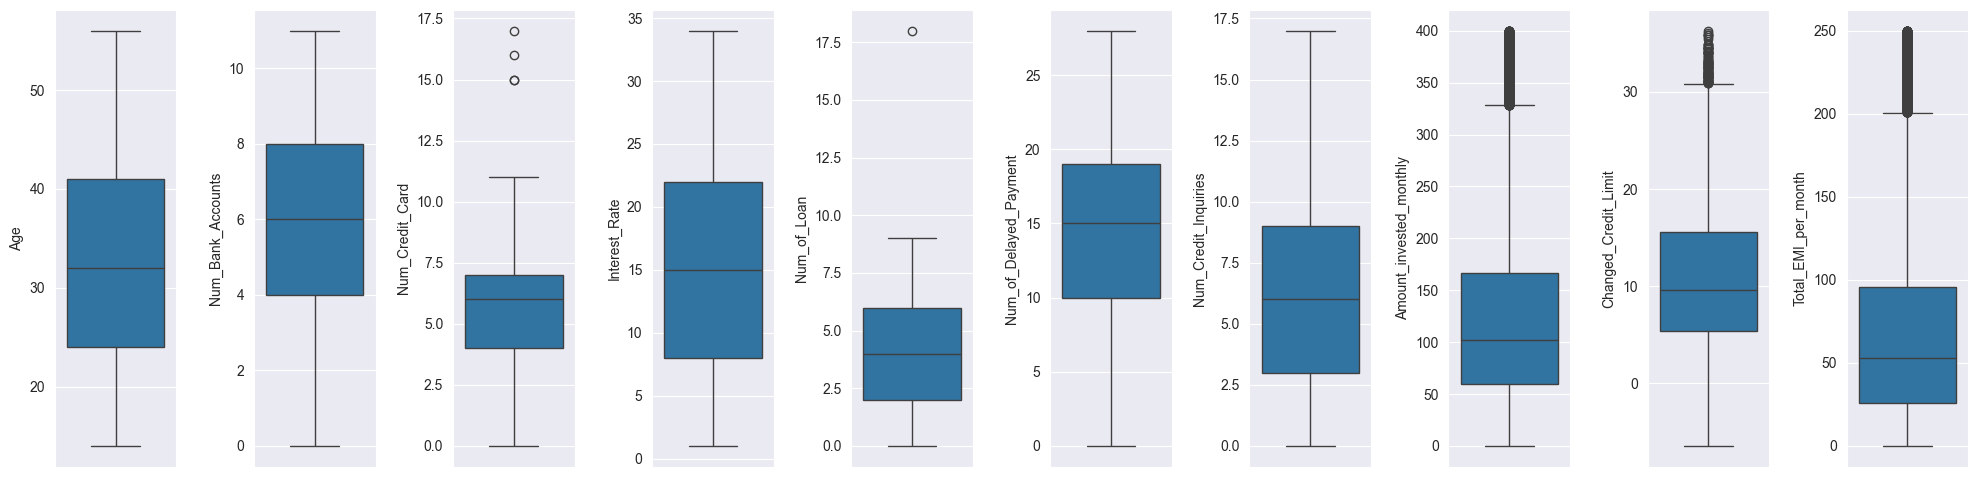

In [55]:
out_col = ['Age', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly', 'Changed_Credit_Limit', 'Total_EMI_per_month' ]

fig, axes = plt.subplots(1,10, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

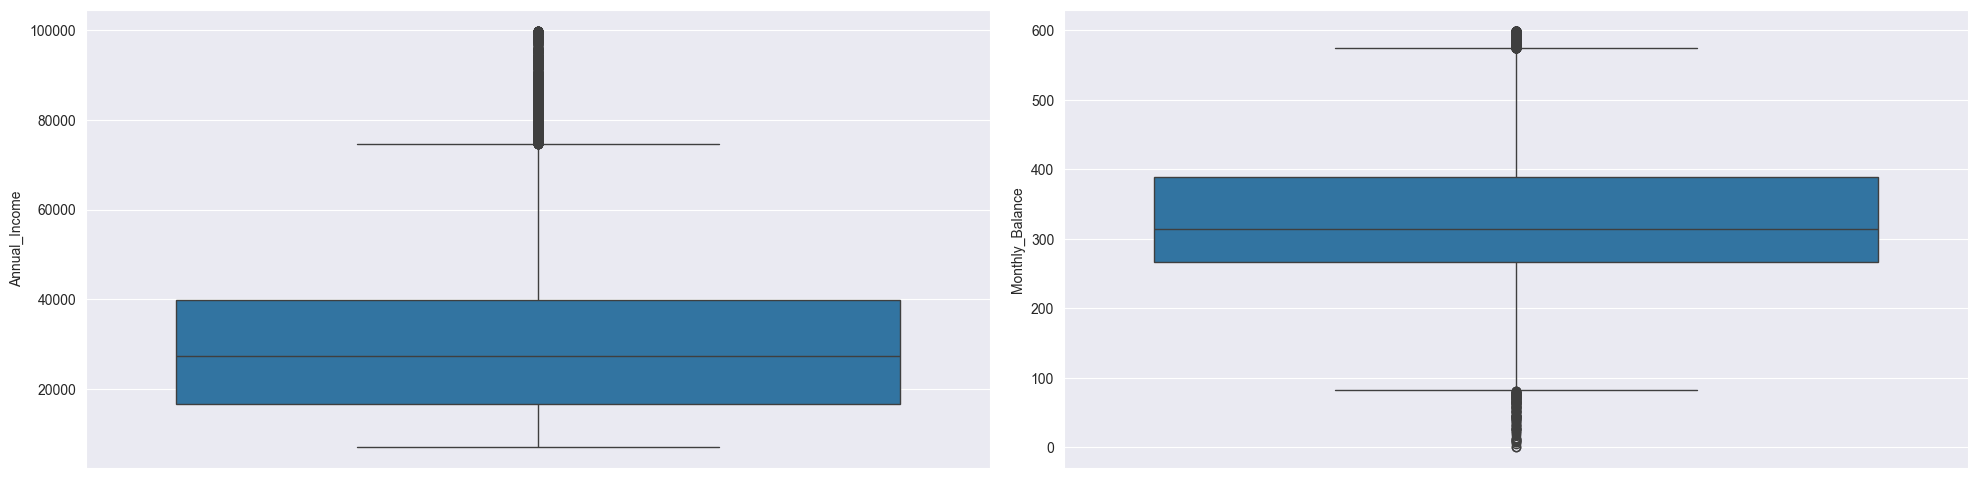

In [173]:
out_col = ['Annual_Income', 'Monthly_Balance' ]

fig, axes = plt.subplots(1,2, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

In [17]:
num_сols_with_missing = [col for col in train_df.columns
                         if train_df[col].isnull().any()]
train_df[num_сols_with_missing] = train_df[num_сols_with_missing].fillna(train_df[num_сols_with_missing].mean())

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Interval
0,3,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,...,809.98,26.822620,265.0,0,49.574949,80.415295,3,312.494089,2,NaN
6,4,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,...,809.98,22.537593,271.0,0,49.574949,178.344067,6,244.565317,2,NaN
8,3,28.0,15,34847.84,3037.986667,2,4,6,1.0,684,...,605.03,24.464031,319.0,0,18.816215,104.291825,6,470.690627,1,NaN
9,2,28.0,13,34847.84,3037.986667,2,4,6,1.0,684,...,605.03,38.550848,320.0,0,18.816215,40.391238,1,484.591214,2,NaN
12,7,28.0,13,34847.84,3037.986667,2,4,6,1.0,684,...,605.03,34.977895,323.0,0,18.816215,130.115420,6,444.867032,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,1,29.0,1,20002.88,1929.906667,10,8,29,5.0,4913,...,3571.70,37.140784,75.0,2,60.964772,34.662906,1,337.362988,1,NaN
99994,6,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,502.38,39.323569,377.0,0,35.104023,140.581403,2,410.256158,0,NaN
99995,0,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,502.38,34.663572,378.0,0,35.104023,60.971333,1,479.866228,0,NaN
99996,7,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,502.38,40.565631,379.0,0,35.104023,54.185950,2,496.651610,0,NaN


C:\Users\snw12\AppData\Local\Temp\ipykernel_29784\1256553564.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_group = train_df.groupby('Interval')


<Axes: >

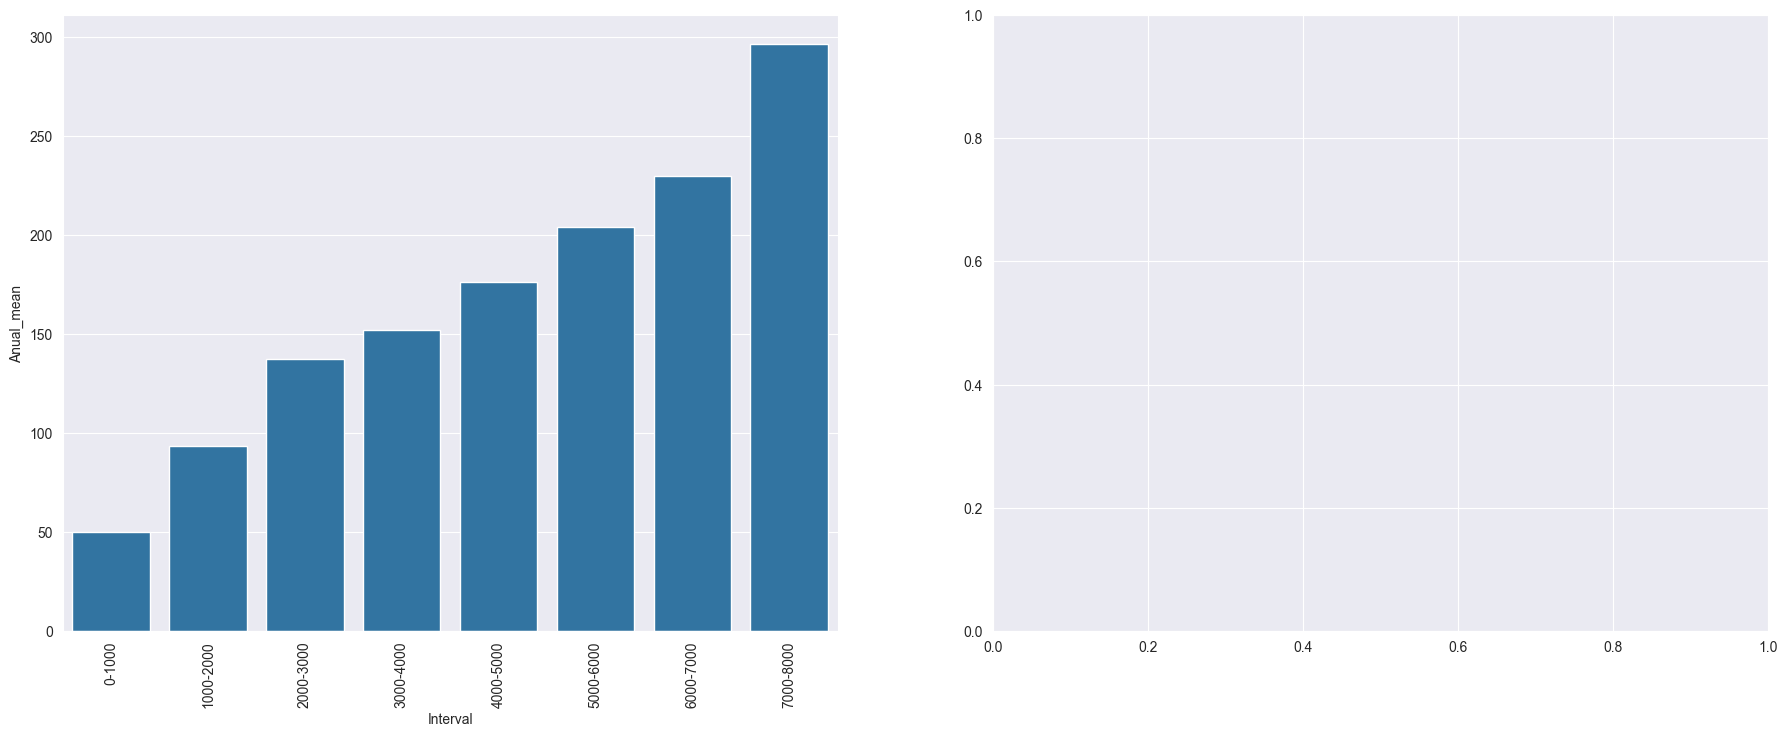

In [36]:

bins = [0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000]
lab  = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000']
train_df['Interval'] = pd.cut(train_df['Monthly_Inhand_Salary'], bins=bins, labels=lab)
occupation_group = train_df.groupby('Interval')
salary_in = (
    occupation_group['Amount_invested_monthly'].mean().reset_index(name = 'Anual_mean')
)

fig, axes = plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Interval', y='Anual_mean', data=salary_in, ax=axes[0])
sns.barplot()

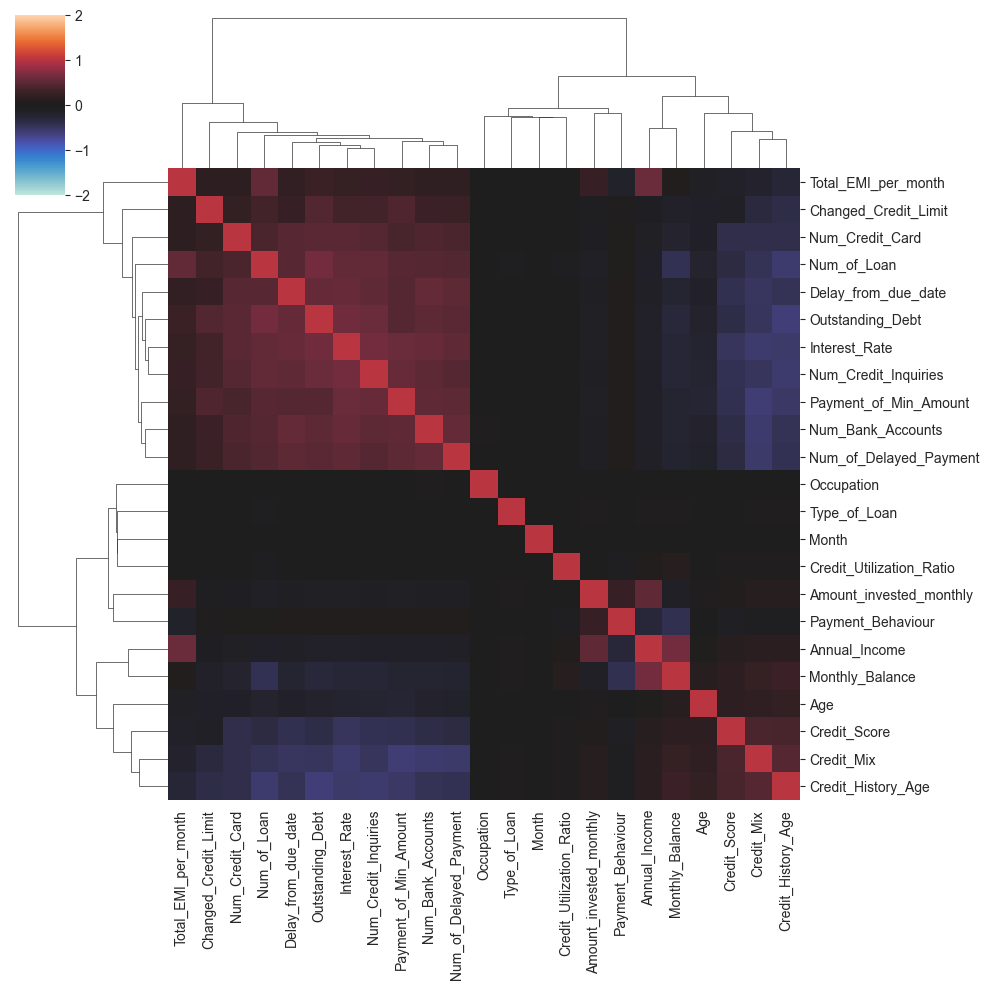

In [19]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-2.0,
        vmax=2.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(train_df, annot=None)


In [20]:
train_df.to_csv(r'D:\study\AI\PredictCreditScoreinit\train_2.csv', header=True, index=True)

In [37]:
list_of_anime = ['Angle of bloodwasting', 'Второй сезон убийцы', 'In other world with penis', 'Fire to se', 'Entrance where chop our her second', 'Initial D 2', 'Charlotka']
a = randrange(7)
print(list_of_anime[a])

Второй сезон убийцы
